In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync import *
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from optopus.ib_adapter import IBBrokerAdapter
from optopus.optopus import Optopus
from optopus.data_manager import DataManager, DataSource
from optopus.data_objects import IndexAsset, StockAsset, OptionChainAsset
from optopus.utils import pdo, plot_option_positions

%matplotlib inline

In [2]:
host = '127.0.0.1'
#port = 4002  # Gateway
port = 7497  # TWS
client = 5

util.startLoop()
ib = IB()

opt = Optopus(IBBrokerAdapter(ib, host, port, client))
opt.start()

[Initializating managers...]
[Starting event listeners...]
[Connecting to IB broker...]
[Updating values...]


In [3]:
ib.portfolio()

[PortfolioItem(contract=Contract(secType='OPT', conId=249238131, symbol='SPY', lastTradeDateOrContractMonth='20180921', strike=270.0, right='P', multiplier='100', primaryExchange='AMEX', currency='USD', localSymbol='SPY   180921P00270000', tradingClass='SPY'), position=-2.0, marketPrice=0.8946527, marketValue=-178.93, averageCost=98.4224, unrealizedPNL=17.91, realizedPNL=0.0, account='DU1129763'),
 PortfolioItem(contract=Contract(secType='OPT', conId=282920901, symbol='SPY', lastTradeDateOrContractMonth='20180921', strike=274.0, right='P', multiplier='100', primaryExchange='AMEX', currency='USD', localSymbol='SPY   180921P00274000', tradingClass='SPY'), position=-1.0, marketPrice=1.20788575, marketValue=-120.79, averageCost=132.472, unrealizedPNL=11.68, realizedPNL=0.0, account='DU1129763'),
 PortfolioItem(contract=Contract(secType='OPT', conId=249238134, symbol='SPY', lastTradeDateOrContractMonth='20180921', strike=275.0, right='P', multiplier='100', primaryExchange='AMEX', currency='

In [4]:
ib.positions()

[Position(account='DU1129763', contract=Contract(secType='OPT', conId=282920906, symbol='SPY', lastTradeDateOrContractMonth='20180921', strike=276.0, right='P', multiplier='100', currency='USD', localSymbol='SPY   180921P00276000', tradingClass='SPY'), position=-14.0, avgCost=99.28310715),
 Position(account='DU1129763', contract=Contract(secType='OPT', conId=301719438, symbol='SPY', lastTradeDateOrContractMonth='20180921', strike=288.0, right='C', multiplier='100', currency='USD', localSymbol='SPY   180921C00288000', tradingClass='SPY'), position=1.0, avgCost=204.4843),
 Position(account='DU1129763', contract=Contract(secType='OPT', conId=282920911, symbol='SPY', lastTradeDateOrContractMonth='20180921', strike=277.0, right='P', multiplier='100', currency='USD', localSymbol='SPY   180921P00277000', tradingClass='SPY'), position=-1.0, avgCost=119.5121),
 Position(account='DU1129763', contract=Contract(secType='OPT', conId=301719435, symbol='SPY', lastTradeDateOrContractMonth='20180921', 

In [5]:
pdo(opt.positions())

,asset_type,expiration,strike,right,ownership,quantity,average_cost
code,,,,,,,
SPY,OPT,2018-09-21,276.0,P,SELL,14.0,99.283107
SPY,OPT,2018-09-21,288.0,C,BUY,1.0,204.484300
SPY,OPT,2018-09-21,277.0,P,SELL,1.0,119.512100
SPY,OPT,2018-09-21,287.0,C,BUY,1.0,254.984300
SPY,OPT,2018-09-21,285.0,C,BUY,1.0,377.484300
SPY,OPT,2018-09-21,286.0,C,BUY,1.0,315.484300
SPY,OPT,2018-09-21,275.0,P,SELL,1.0,87.512500
SPY,OPT,2018-09-21,270.0,P,SELL,2.0,98.422400
SPY,OPT,2018-09-21,274.0,P,SELL,1.0,132.472000


In [6]:
u = StockAsset('SPY', DataSource.IB)

In [7]:
price = pdo(opt.current(u, ['market_price']))['market_price']

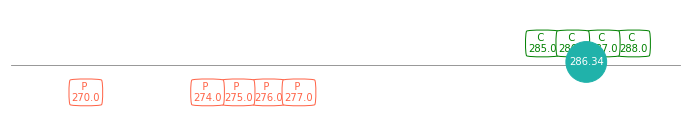

In [8]:
plot_option_positions(opt.positions(), underlying_price = price)